In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/AQI2a.csv')
df.head()

,Date,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD,SR,BP,AT,AQI
0,01-06-2018,61.78,237.73,1.43,20.60,40.11,14.59,0.83,41.57,30.56,43.70,5.25,93.52,137.36,740.81,36.12,191.820000
1,02-06-2018,38.33,128.20,1.10,20.52,29.29,10.97,0.73,42.91,30.01,43.06,4.07,121.45,129.31,740.79,33.30,118.800000
2,03-06-2018,48.44,129.76,0.58,16.72,37.42,10.02,0.91,40.61,30.17,45.60,3.86,107.76,134.96,740.36,35.37,119.840000
3,04-06-2018,54.93,183.18,0.73,18.10,35.32,15.18,0.82,39.83,29.33,42.40,5.27,106.72,129.10,740.27,38.12,155.453333
4,05-06-2018,45.42,141.58,1.25,17.34,46.33,9.24,0.75,28.91,27.21,41.74,4.61,80.99,124.14,740.71,38.43,127.720000


In [3]:
df.tail()

,Date,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,Temp,RH,WS,WD,SR,BP,AT,AQI
1592,10-10-2022,8.58,16.10,0.83,5.87,7.44,14.52,0.75,16.64,32.13,81.05,0.77,306.15,41.67,742.00,23.61,37.500000
1593,11-10-2022,24.99,103.96,1.23,10.77,6.77,19.45,0.46,18.34,31.92,77.72,0.30,269.32,78.06,741.85,26.99,102.640000
1594,12-10-2022,70.40,143.66,1.04,20.59,8.02,20.77,0.22,32.98,31.44,72.17,0.30,69.45,107.74,742.00,28.58,134.666667
1595,13-10-2022,53.60,160.95,1.39,21.82,6.34,17.16,0.41,25.87,29.38,64.70,0.30,55.64,120.30,742.00,28.18,140.633333
1596,14-10-2022,71.08,176.77,1.43,18.68,19.53,18.34,0.15,18.57,33.57,63.01,0.30,55.51,119.14,742.00,28.35,151.180000


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1597 non-null   object 
 1   PM2.5   1597 non-null   float64
 2   PM10    1597 non-null   float64
 3   NO      1597 non-null   float64
 4   NO2     1597 non-null   float64
 5   NH3     1597 non-null   float64
 6   SO2     1597 non-null   float64
 7   CO      1597 non-null   float64
 8   Ozone   1597 non-null   float64
 9   Temp    1597 non-null   float64
 10  RH      1597 non-null   float64
 11  WS      1597 non-null   float64
 12  WD      1597 non-null   float64
 13  SR      1597 non-null   float64
 14  BP      1597 non-null   float64
 15  AT      1597 non-null   float64
 16  AQI     1597 non-null   float64
dtypes: float64(16), object(1)
memory usage: 212.2+ KB


In [5]:
from datetime import datetime

In [6]:
df['Date']=pd.to_datetime(df['Date'])

/var/folders/cn/r_mvyq893c357lflld6x0pvw0000gn/T/ipykernel_51659/3023999556.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [7]:
df['year']=df['Date'].apply(lambda date:date.year)
df['month']=df['Date'].apply(lambda date:date.month)

In [8]:
df.drop('Date',axis=1,inplace=True)

<AxesSubplot: xlabel='month'>

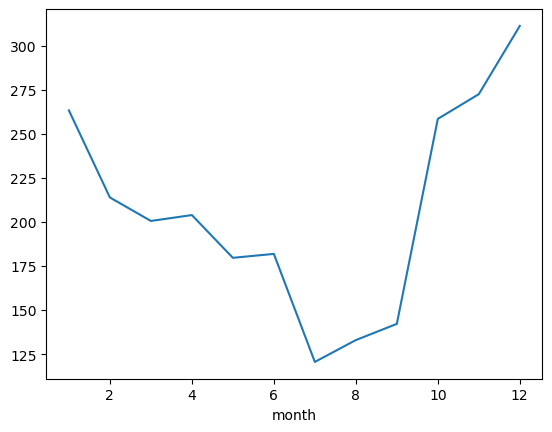

In [9]:
df.groupby('month').mean()['AQI'].plot()

<AxesSubplot: xlabel='year'>

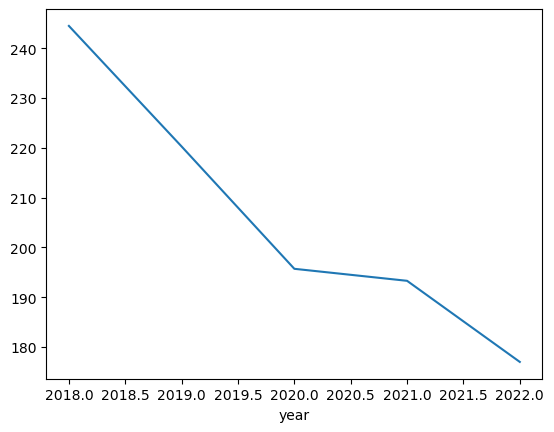

In [10]:
df.groupby('year').mean()['AQI'].plot()

In [11]:
x=df.drop('AQI',axis=1)
y=df['AQI']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train= scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-04-04 13:04:42.649304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-04 13:04:42.649871: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                342       
                                                                 
 dense_1 (Dense)             (None, 19)                380       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 19)                380       
                                                                 
 dense_4 (Dense)             (None, 1)                 20        
                                                                 
Total params: 1,502
Trainable params: 1,502
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400


2023-04-04 13:04:57.915107: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/9 [==>...........................] - ETA: 2s - loss: 59681.3008

2023-04-04 13:04:58.128633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 1s 25ms/step - loss: 59298.1719 - val_loss: 54127.5781
Epoch 2/400
9/9 [==============================] - 0s 8ms/step - loss: 59179.1797 - val_loss: 53988.7461
Epoch 3/400
9/9 [==============================] - 0s 8ms/step - loss: 59003.7305 - val_loss: 53775.2227
Epoch 4/400


2023-04-04 13:04:58.446825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 11ms/step - loss: 58739.1641 - val_loss: 53442.3047
Epoch 5/400
9/9 [==============================] - 0s 7ms/step - loss: 58311.3164 - val_loss: 52901.8125
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 57605.6523 - val_loss: 52007.0000
Epoch 7/400
9/9 [==============================] - 0s 7ms/step - loss: 56446.5781 - val_loss: 50528.7461
Epoch 8/400
9/9 [==============================] - 0s 7ms/step - loss: 54534.5117 - val_loss: 48153.2773
Epoch 9/400
9/9 [==============================] - 0s 7ms/step - loss: 51600.8555 - val_loss: 44494.8672
Epoch 10/400
9/9 [==============================] - 0s 7ms/step - loss: 47118.8711 - val_loss: 39261.1758
Epoch 11/400
9/9 [==============================] - 0s 7ms/step - loss: 40890.0742 - val_loss: 32300.8184
Epoch 12/400
9/9 [==============================] - 0s 8ms/step - loss: 32866.2500 - val_loss: 24130.8359
Epoch 13/400
9/9 [==============================] - 0s 8ms/step

In [21]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot: >

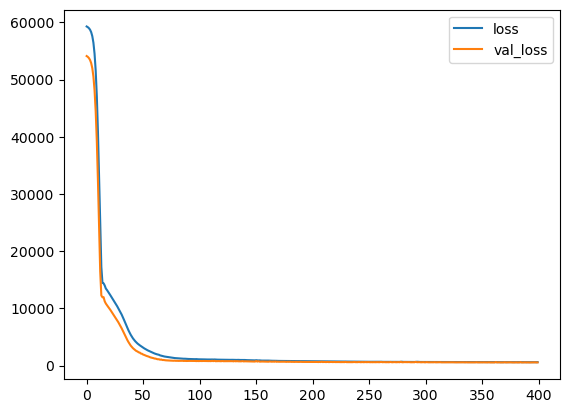

In [23]:
loss.plot()

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [26]:
predictions=model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


2023-04-04 13:07:26.623692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [27]:
mean_absolute_error(y_test,predictions)

16.649308982642008

In [28]:
np.sqrt(mean_squared_error(y_test,predictions))

23.437214944337388

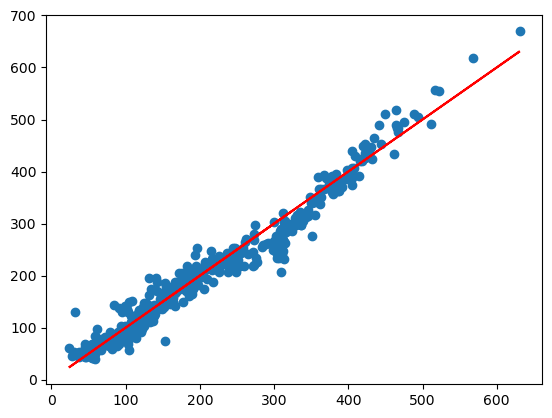

In [29]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [32]:
single = df.drop('AQI',axis=1).iloc[0]
single.shape

(17,)

In [34]:
single_house = scaler.transform(np.array(single).reshape(-1, 17))

/Users/arvindramesh/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
model.predict(single_house)

1/1 [==============================] - 0s 132ms/step


2023-04-04 13:10:02.747842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[192.6022]], dtype=float32)

In [38]:
df['AQI'].iloc[0]

191.82